# Aykırı Gözlemlerin Tespiti Ve Ortalamayla Doldurulması İşlemi

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df['table']

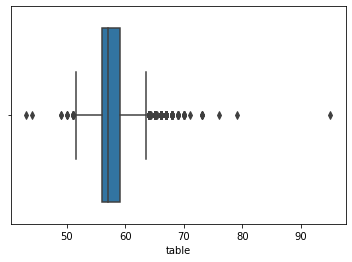

In [4]:
sns.boxplot(x=df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [6]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [10]:
aykiri_gozlemler = (df_table < alt_sinir) | (df_table > ust_sinir)

In [11]:
df_table[aykiri_gozlemler] = df_table.mean()

C:\Users\murat\AppData\Local\Temp\ipykernel_8180\931317358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_gozlemler] = df_table.mean()


In [12]:
df_table[aykiri_gozlemler]

2        57.459505
91       57.459505
145      57.459505
219      57.459505
227      57.459505
           ...    
53695    57.459505
53697    57.459505
53756    57.459505
53757    57.459505
53785    57.459505
Name: table, Length: 589, dtype: float64